# El tratamiento de las variables categóricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/ecom-expense/Ecom Expense.csv')

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender')
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix='City')

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()

In [9]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [10]:
feature_cols = [ 'Monthly Income', 'Transaction Time', 
                'Gender_Female','Gender_Male', 
                'City_Tier 1', 'City_Tier 2', 'City_Tier 3',
               'Record']

In [11]:
X = df_new[feature_cols]
Y = df_new['Total Spend']

In [12]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [13]:
lm.intercept_, lm.coef_

(-79.41713030136816,
 array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
         7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02]))

In [14]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Female', -131.0250132555454),
 ('Gender_Male', 131.02501325554525),
 ('City_Tier 1', 76.76432601049507),
 ('City_Tier 2', 55.138974309232566),
 ('City_Tier 3', -131.90330031972772),
 ('Record', 772.2334457445634)]

In [15]:
lm.score(X,Y)

0.9179923586131016

In [16]:
df_new['prediction'] = lm.predict(X)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [17]:
SSD = np.sum((df_new['prediction'] - df_new['Total Spend']) **2)
SSD

1517733985.3408165

In [18]:
RSE = np.sqrt(SSD / (len(df_new) - len(feature_cols) - 1))
RSE

803.1318809818166

In [19]:
sales_mean = np.mean(df_new['Total Spend'])
sales_mean

6163.176415976715

In [20]:
error = RSE / sales_mean
error

0.1303113568029416

In [21]:
df.corr()

,Age,Items,Monthly Income,Transaction Time,Record,Total Spend
Age,1.000000,0.016626,0.010164,-0.007045,0.003397,0.033610
Items,0.016626,1.000000,-0.013364,-0.020551,0.012683,0.067042
Monthly Income,0.010164,-0.013364,1.000000,-0.044855,0.018491,0.438623
Transaction Time,-0.007045,-0.020551,-0.044855,1.000000,-0.005044,-0.005610
Record,0.003397,0.012683,0.018491,-0.005044,1.000000,0.857675
Total Spend,0.033610,0.067042,0.438623,-0.005610,0.857675,1.000000


## Eliminar variables Dummy redundantes

In [22]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender').iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [23]:
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix='City').iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [24]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [25]:
feature_cols = ['Monthly Income', 'Transaction Time', 'Gender_Male', 'City_Tier 2', 'City_Tier 3', 'Record']
X = df_new[feature_cols]
Y = df_new['Total Spend']
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [26]:
print(lm.intercept_)

-133.67781754642238


In [27]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Male', 262.0500265110957),
 ('City_Tier 2', -21.62535170126307),
 ('City_Tier 3', -208.66762633022307),
 ('Record', 772.2334457445637)]

In [28]:
lm.score(X,Y)

0.9179923586131016

# Transformación de variables para conseguir una relación no lineal

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data_auto = pd.read_csv('../datasets/auto/auto-mpg.csv')
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [31]:
data_auto.shape

(406, 9)

Text(0.5, 1.0, 'CP vs MPG')

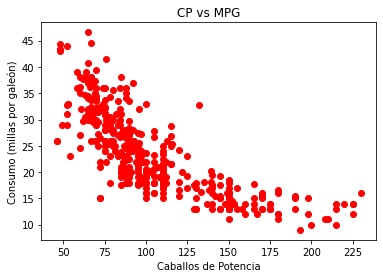

In [32]:
%matplotlib inline
data_auto['mpg'] = data_auto['mpg'].dropna()
data_auto['horsepower'] = data_auto['horsepower'].dropna()
plt.plot(data_auto['horsepower'], data_auto['mpg'], 'ro')
plt.xlabel('Caballos de Potencia')
plt.ylabel('Consumo (millas por galeón)')
plt.title('CP vs MPG')

De entrada podemos ver que los datos se muestran como una curva, sin embargo vamos a intentar convertirlo primeramente en una relación lineal
## Modelo de regresión lineal
* mpg = a + b * horsepower

In [33]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
X = X.to_numpy()
X = X[:, np.newaxis]
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
#print(X)

In [34]:
lm = LinearRegression()
lm.fit(X,Y) # Este linearRegression solo acepta dataframes, como X es una única variable, 
# le añadimos un corchete a la X para solucionar el problema 

LinearRegression()

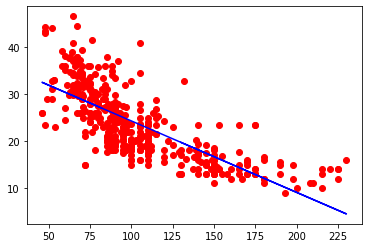

In [35]:
%matplotlib inline
plt.plot(X,Y, 'ro')
plt.plot(X, lm.predict(X), color = 'blue')

In [36]:
lm.score(X,Y)

0.5746533406450252

In [37]:
SSD = np.sum((Y - lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X) - 1))
y_mean = np.mean(Y)
error = RSE / y_mean

SSD, RSE, error

(10315.751960060918, 5.046879480825511, 0.21462773361633472)

Error del 21%

## Modelo de regresión cuadrático
* mpg = a + b * horsepower^2

In [38]:
X = (data_auto['horsepower'].fillna(data_auto['horsepower'].mean()))**2
X = X.to_numpy()
X = X[:, np.newaxis]

In [39]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [40]:
lm.score(X,Y)

0.4849887034823205

In [41]:
SSD = np.sum((Y - lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X) - 1))
y_mean = np.mean(Y)
error = RSE / y_mean

SSD, RSE, error

(12490.350340501926, 5.553410772769817, 0.23616889852998113)

Margen de error del 23,6%

## Modelo de regresión lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower^2

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [43]:
poly = PolynomialFeatures(degree=2)

In [44]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
X = X.to_numpy()
X = X[:, np.newaxis]
X = poly.fit_transform(X)

In [45]:
lm = linear_model.LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [46]:
lm.score(X,Y)

0.6439066584257469

In [47]:
SSD = np.sum((Y - lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X) - 1))
y_mean = np.mean(Y)
error = RSE / y_mean

SSD, RSE, error

(8636.180643524502, 4.61778115803654, 0.196379546619069)

In [48]:
lm.intercept_

55.026192447081144

In [49]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 - 0.434*hp + 0.00112615* hp^2

Para saber qué grado usar, podemos hacer algo así:

In [50]:
for i in range(2,11):
    poly = PolynomialFeatures(degree=i)
    X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
    X = X.to_numpy()
    X = X[:, np.newaxis]
    X = poly.fit_transform(X)
    lm = linear_model.LinearRegression()
    lm.fit(X, Y)
    print(i, ' - ', lm.score(X,Y))

2  -  0.6439066584257469
3  -  0.6444678885560744
4  -  0.6467674189704502
5  -  0.6547512491363356
6  -  0.6572723767653663
7  -  0.6538575072113109
8  -  0.6512432185890784
9  -  0.6510536273625291
10  -  0.6523567330767083


In [51]:
def regression_validation(lm, X, Y):
    SSD = np.sum((Y - lm.predict(X))**2)
    RSE = np.sqrt(SSD/(len(X) - 1))
    y_mean = np.mean(Y)
    error = RSE / y_mean

    print(SSD, RSE, error)

In [52]:
regression_validation(lm, X, Y)

8431.244570262505 4.5626623618024436 0.1940355195107677


# El problema de los outliers

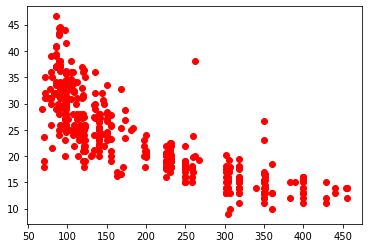

In [54]:
plt.plot(data_auto['displacement'], data_auto['mpg'], 'ro')

Siempre hacer el modelo con los outliers y luego hacerlo sin ellos. A ver cómo da

In [57]:
X = data_auto['displacement'].fillna(data_auto['displacement'].mean())
X = X[:, np.newaxis]
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())

lm = LinearRegression()
lm.fit(X, Y)

C:\Users\user\AppData\Local\Temp\ipykernel_22652\343803695.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, np.newaxis]


LinearRegression()

In [58]:
lm.score(X, Y)

0.6261049762826918

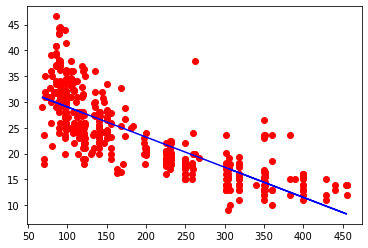

In [59]:
plt.plot(X,Y, 'ro')
plt.plot(X, lm.predict(X), color = 'blue')

In [60]:
data_auto[(data_auto['displacement']>250) & (data_auto['mpg'] > 35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [62]:
data_auto[(data_auto['displacement']>300) & (data_auto['mpg'] > 20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [63]:
 data_auto_clean = data_auto.drop([395,258,305,372])

In [64]:
X = data_auto_clean['displacement'].fillna(data_auto_clean['displacement'].mean())
X = X[:, np.newaxis]
Y = data_auto_clean['mpg'].fillna(data_auto_clean['mpg'].mean())

lm = LinearRegression()
lm.fit(X, Y)

C:\Users\user\AppData\Local\Temp\ipykernel_22652\3007002438.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, np.newaxis]


LinearRegression()

In [65]:
lm.score(X, Y)

0.6466514317531822

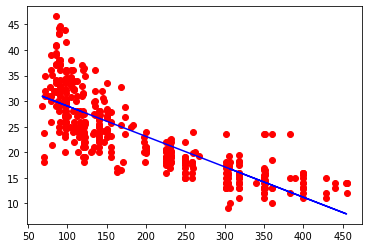

In [66]:
plt.plot(X,Y, 'ro')
plt.plot(X, lm.predict(X), color = 'blue')